In [1]:
import pandas as pd
import numpy as np



file = "aes_data.xlsx"

data = pd.read_excel(file)




# data = data.drop([0,1,2], axis=0)

df = data.drop([0,1,2], axis=0)
cols_fillna = df.columns.values
for col in cols_fillna[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    

    

# df[cols_fillna[-1]][df[cols_fillna[-1]].isnull()]

data.head()


,Время,10LAB11CP002_XQ01,10LAB12CP002_XQ01,10LAB13CP002_XQ01,10LAB14CP002_XQ01,10LAB15CP002_XQ01,10LAB11CP003_XQ01,10LAB12CP003_XQ01,10LAB13CP003_XQ01,10LAB14CP003_XQ01,...,10LAC12CS001A_XQ01,10LAC13CS001A_XQ01,10LAC14CS001A_XQ01,10LAC15CS001A_XQ01,10BBA00CE010_XQ01,10BBB00CE010_XQ01,10BBC00CE010_XQ01,10BBD00CE010_XQ01,10MKA10CE912_XQ01,10JKS00FU901_XQ01
0,NaN,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,...,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание
1,NaN,дост Р ПИТВ ВСАС ПИТ НАС 0-1.6 МПА,дост Р ПИТВ ВСАС ПИТ НАС 0-1.6 МПА,дост Р ПИТВ ВСАС ПИТ НАС 0-1.6 МПА,дост Р ПИТВ ВСАС ПИТ НАС 0-1.6 МПА,дост Р ПИТВ ВСАС ПИТ НАС 0-1.6 МПА,дост Р ПИТВ НАП ПИТ НАС 0-16 МПА,дост Р ПИТВ НАП ПИТ НАС 0-16 МПА,дост Р ПИТВ НАП ПИТ НАС 0-16 МПА,дост Р ПИТВ НАП ПИТ НАС 0-16 МПА,...,дост Частота вращения ротора электродвигателя,дост Частота вращения ротора электродвигателя,дост Частота вращения ротора электродвигателя,дост Частота вращения ротора электродвигателя,дост U НА СЕКЦ BBA 0-13 КВ,дост U НА СЕКЦ BBB 0-13 КВ,дост U НА СЕКЦ BBC 0-13 КВ,дост U НА СЕКЦ BBD 0-13 КВ,дост -100-1500 MBT,дост Среднее значение мощности реактора
2,NaN,МПа,МПа,МПа,МПа,МПа,МПа,МПа,МПа,МПа,...,об/мин,об/мин,об/мин,об/мин,кВ,кВ,кВ,кВ,МВт,МВт
3,01.01.19 00:00:00,0.80,0.76,0.75,0.80,0.77,0.7,9.4,9.5,0.8,...,2995,2994,0,2995,10.5,10.2,10.5,10.4,576,1803
4,01.01.19 01:00:00,0.80,0.76,0.75,0.80,0.77,0.7,9.4,9.5,0.8,...,2995,2996,0,2995,10.5,10.2,10.5,10.4,575,1795


In [2]:
# df[cols_fillna[-1]] = df[cols_fillna[-1]].fillna(0)

# df[cols_fillna[-1]][df[cols_fillna[-1]].isnull()]

In [3]:
# df.head()
# data.fillna('-').head()
# df.dtypes


In [4]:
print(df.isnull().values.any())
df.fillna(0)
print(df.isnull().values.any())


False
False


In [5]:
# df[df.isnull()]
# df


In [6]:
import matplotlib.pyplot as plt
import pandas as pd



# a scatter plot comparing num_children and num_pets
# data.iloc[:5,:].reset_index().plot(kind='line',x='index',y='10LAB11CP002_XQ01',color='red', ax=ax)


x, y = df['10LAB11CP002_XQ01'].min(), df['10LAB11CP002_XQ01'].max()
# df['SIZE'] = (df.TOTAL - x) / (y - x) * (b - a) + a


plot_df = pd.to_numeric(df['10LAB11CP002_XQ01'], errors='coerce')

df1 = (plot_df - plot_df.mean())/plot_df.std()

df1.head()




3   -0.032401
4   -0.032401
5   -0.032401
6   -0.032401
7   -0.032401
Name: 10LAB11CP002_XQ01, dtype: float64

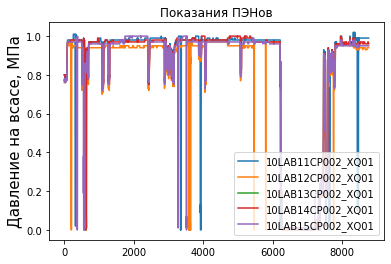

In [7]:
# ax = plt.gca()
# plt.plot(df.reset_index()['index'], df['10LAB11CP002_XQ01'], df['10LAB12CP002_XQ01'])

# plt.show()


# line1, = plt.plot(df.reset_index()['index'], df['10LAB11CP002_XQ01'], label="Line 1", )
# line2, = plt.plot(df.reset_index()['index'], df['10LAB12CP002_XQ01'], label="Line 2", )

# # Create a legend for the first line.


# legend = plt.legend(handles=[line1, line2], loc=4, fontsize='small', fancybox=True)

# # Add the legend manually to the current Axes.
# ax = plt.gca().add_artist(legend)

# # Create another legend for the second line.
# # plt.legend(handles=[line2], loc='lower right')
# plt.title('Показания ПЭНов')
# plt.ylabel('Давление на всасе', fontsize=12)
# plt.show()

df["10LAB13CP002_XQ01"] = df.loc[df["10LAB13CP002_XQ01"]>8, "10LAB13CP002_XQ01"].apply(lambda x: x-x//1)


for col in df.columns.values[1:]:
    df[col] = df[col].apply(lambda x: 0 if x<0 else x)



pump_columns = ["10LAB11CP002_XQ01","10LAB12CP002_XQ01","10LAB13CP002_XQ01","10LAB14CP002_XQ01","10LAB15CP002_XQ01"]

# plt.rcParams["figure.figsize"] = (20,10)

plot = df.plot(use_index=True, y=pump_columns)
plt.title('Показания ПЭНов')
plt.ylabel('Давление на всасе, МПа', fontsize=15)
plt.legend(loc='lower right')
plt.show()


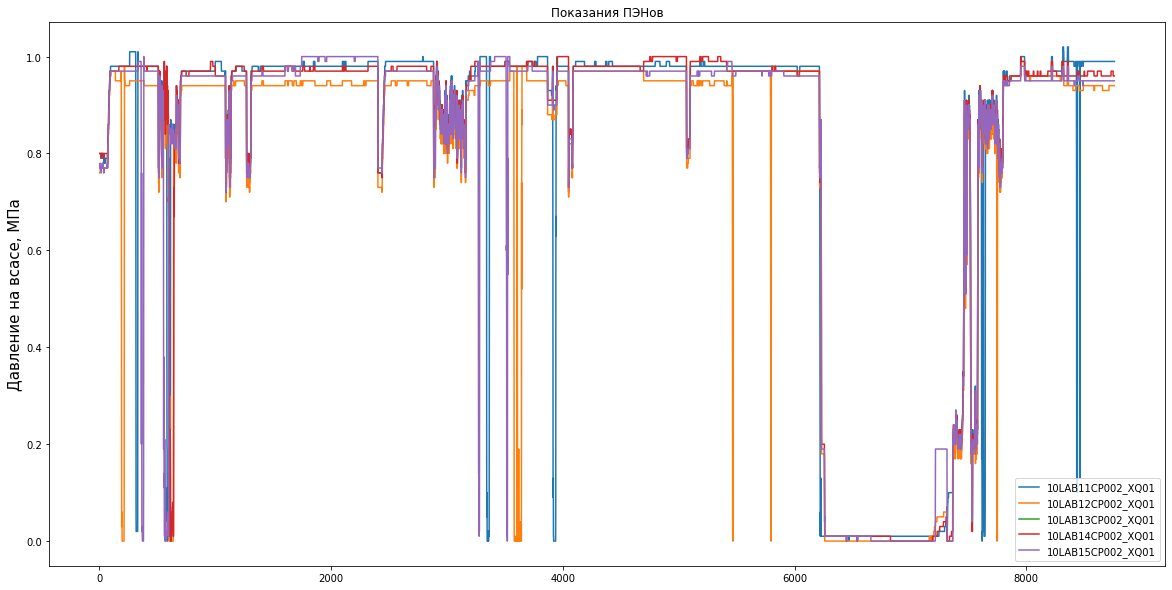

In [39]:
# ax = plt.gca()
# plt.plot(df.reset_index()['index'], df['10LAB11CP002_XQ01'], df['10LAB12CP002_XQ01'])

# plt.show()


# line1, = plt.plot(df.reset_index()['index'], df['10LAB11CP002_XQ01'], label="Line 1", )
# line2, = plt.plot(df.reset_index()['index'], df['10LAB12CP002_XQ01'], label="Line 2", )

# # Create a legend for the first line.


# legend = plt.legend(handles=[line1, line2], loc=4, fontsize='small', fancybox=True)

# # Add the legend manually to the current Axes.
# ax = plt.gca().add_artist(legend)

# # Create another legend for the second line.
# # plt.legend(handles=[line2], loc='lower right')
# plt.title('Показания ПЭНов')
# plt.ylabel('Давление на всасе', fontsize=12)
# plt.show()

df["10LAB13CP002_XQ01"] = df.loc[df["10LAB13CP002_XQ01"]>8, "10LAB13CP002_XQ01"].apply(lambda x: x-x//1)
# pump_columns = ["10LAB11CP003_XQ01","10LAB12CP003_XQ01","10LAB13CP003_XQ01","10LAB14CP003_XQ01","10LAB15CP003_XQ01"]

pump_columns = ["10LAB11CP002_XQ01","10LAB12CP002_XQ01","10LAB13CP002_XQ01","10LAB14CP002_XQ01","10LAB15CP002_XQ01"]

plt.rcParams["figure.figsize"] = (20,10)

plot = df.plot(use_index=True, y=pump_columns)
plt.title('Показания ПЭНов')
plt.ylabel('Давление на всасе, МПа', fontsize=15)
plt.legend(loc='lower right')
plt.show()


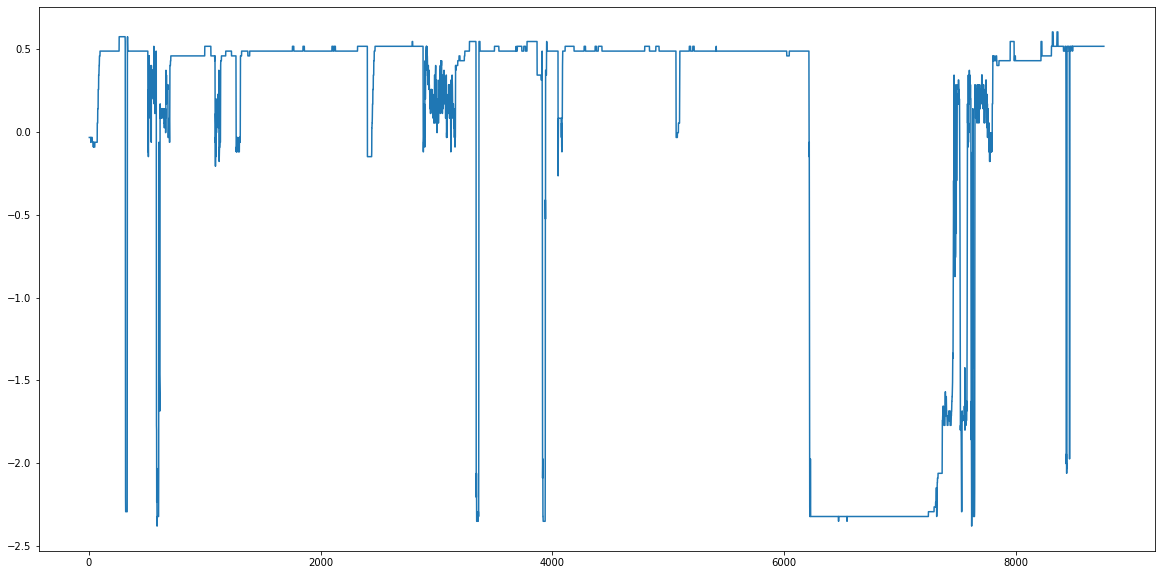

In [9]:
df1.head()

plt.plot(df.reset_index()['index'], df1)


In [10]:
plot_df2 = pd.to_numeric(df['10JKS00FU901_XQ01'], errors='coerce')

df2 = (plot_df2-plot_df2.mean())/plot_df2.std()
df2.head()

3   -0.453021
4   -0.458913
5   -0.469224
6   -0.811712
7   -0.822760
Name: 10JKS00FU901_XQ01, dtype: float64

In [11]:
# plt.plot(df.reset_index()['index'], df2)

In [12]:
# v1 = pd.to_numeric(df['10JKS00FU901_XQ01'], errors='coerce')[:3000]
# v2 = pd.to_numeric(df['10LAB11CP002_XQ01'], errors='coerce')[:3000]



# np.cov(v1.to_numpy().T,v2.to_numpy().T, rowvar=0)

np.cov(df1.to_numpy()[:].T,df2.to_numpy()[:].T, rowvar=0)




array([[1.        , 0.79351791],
       [0.79351791, 1.        ]])

In [13]:
np.corrcoef(df1.to_numpy()[:], df2.to_numpy()[:])

array([[1.        , 0.79351791],
       [0.79351791, 1.        ]])

In [14]:
np.correlate(df1,df2)

array([6949.62987013])

In [15]:
filtered_df = df1[df1.isnull()]

In [16]:
print(filtered_df)

Series([], Name: 10LAB11CP002_XQ01, dtype: float64)


In [17]:
filtered_df = df2[df2.isnull()]
print(filtered_df)

Series([], Name: 10JKS00FU901_XQ01, dtype: float64)


In [18]:
# df2 = df2.apply(lambda x: x*2)
# df2
from iapws import IAPWS97, IAPWS95

sat_steam = IAPWS97(P=1, x=1)

In [37]:

def eff_func(row, pump_num):
    p1 = df[f'10LAB{pump_num}CP002_XQ01'][row]
    p2 = df[f'10LAB{pump_num}CP003_XQ01'][row]
    G = df[f'10LAB{pump_num}CF001_XQ01'][row]
    t = df["10LAB00FT902_XQ01"][row]
    
    I = df[f"10LAC{pump_num}CE021_XQ01"][row]
    U = df["10BBA00CE010_XQ01"][row]
    
    
    
#     print(p1, p2, (p1+p2)/2, G, t, bool(p1), bool(p2), bool(G), bool(t))
    
    
    if all([(p2-p1)*G,U*I, t]):
#         print(p1, p2, (p1+p2)/2, t)
        rho = IAPWS97(P=(p1+p2)/2, T=t+273).rho
#         print(p1, p2, (p1+p2)/2, t)
    
        ef = (p2-p1)*1000*G/(U*I*rho)
        
        if ef>0:
            print(p1, p2, round(p2-p1, 2), G, t, U, I, round(rho,2), round(ef,2))
        
        return ef
        
    else:
        return 0
    #     print(p1, p2, (p1+p2)/2, t)
#     rho = IAPWS97(P=(p1+p2)/2, T=t+273).rho


# pump1_eff = df.apply(lambda x: f(df["10LAB11CP002_XQ01"],df["10LAB11CP003_XQ01"]))
pump1_eff = df.apply(lambda x: eff_func(x.name, 11), axis=1)




0.8 9.6 8.8 249.0 166.0 10.5 259.0 904.4 0.89
0.79 9.4 8.61 300.0 166.0 10.5 271.0 904.33 1.0
0.79 9.3 8.51 328.0 166.0 10.5 273.0 904.3 1.08
0.79 9.3 8.51 326.0 166.0 10.5 280.0 904.3 1.04
0.79 9.2 8.41 372.0 166.0 10.5 288.0 904.27 1.14
0.79 9.2 8.41 375.0 166.0 10.5 287.0 904.27 1.16
0.79 9.2 8.41 378.0 166.0 10.5 289.0 904.27 1.16
0.79 9.2 8.41 380.0 166.0 10.5 288.0 904.27 1.17
0.79 9.2 8.41 376.0 166.0 10.5 288.0 904.27 1.16
0.79 9.2 8.41 376.0 166.0 10.5 290.0 904.27 1.15
0.78 9.2 8.42 360.0 166.0 10.5 287.0 904.27 1.11
0.79 9.2 8.41 377.0 166.0 10.5 290.0 904.27 1.15
0.79 9.2 8.41 377.0 166.0 10.5 290.0 904.27 1.15
0.79 9.2 8.41 375.0 166.0 10.5 290.0 904.27 1.15
0.79 9.2 8.41 376.0 166.0 10.5 290.0 904.27 1.15
0.79 9.2 8.41 375.0 166.0 10.5 288.0 904.27 1.15
0.79 9.2 8.41 376.0 166.0 10.5 289.0 904.27 1.15
0.78 9.2 8.42 375.0 166.0 10.5 290.0 904.27 1.15
0.78 9.2 8.42 379.0 166.0 10.5 291.0 904.27 1.15
0.78 9.2 8.42 378.0 166.0 10.5 291.0 904.27 1.15
0.78 9.2 8.42 373.0 166.0 

0.98 8.7 7.72 449.0 178.0 10.3 304.0 891.83 1.24
0.98 8.7 7.72 455.0 178.0 10.3 304.0 891.83 1.26
0.98 8.9 7.92 435.0 178.0 10.3 302.0 891.9 1.24
0.98 8.6 7.62 457.0 178.0 10.3 306.0 891.8 1.24
0.98 8.6 7.62 459.0 178.0 10.3 306.0 891.8 1.24
0.98 8.6 7.62 459.0 178.0 10.3 306.0 891.8 1.24
0.98 8.6 7.62 460.0 178.0 10.3 306.0 891.8 1.25
0.98 8.6 7.62 458.0 178.0 10.3 306.0 891.8 1.24
0.98 8.6 7.62 461.0 178.0 10.3 309.0 891.8 1.24
0.98 8.6 7.62 467.0 178.0 10.3 309.0 891.8 1.25
0.98 8.6 7.62 462.0 178.0 10.3 309.0 891.8 1.24
0.98 8.6 7.62 458.0 178.0 10.3 306.0 891.8 1.24
0.98 8.6 7.62 457.0 178.0 10.3 306.0 891.8 1.24
0.98 8.6 7.62 457.0 178.0 10.3 306.0 891.8 1.24
0.98 8.6 7.62 458.0 178.0 10.3 306.0 891.8 1.24
0.98 8.6 7.62 456.0 178.0 10.3 306.0 891.8 1.24
0.98 8.6 7.62 454.0 178.0 10.3 306.0 891.8 1.23
0.98 8.6 7.62 457.0 178.0 10.3 306.0 891.8 1.24
0.98 8.6 7.62 456.0 178.0 10.3 306.0 891.8 1.24
0.98 8.6 7.62 458.0 178.0 10.3 306.0 891.8 1.24
0.98 8.6 7.62 458.0 178.0 10.3 307.0 8

0.97 8.6 7.63 468.0 177.0 10.3 313.0 892.85 1.24
0.97 8.6 7.63 470.0 177.0 10.3 313.0 892.85 1.25
0.97 8.5 7.53 470.0 177.0 10.3 313.0 892.82 1.23
0.97 8.6 7.63 467.0 177.0 10.3 313.0 892.85 1.24
0.97 8.6 7.63 468.0 177.0 10.3 310.0 892.85 1.25
0.97 8.6 7.63 470.0 177.0 10.3 310.0 892.85 1.26
0.97 8.6 7.63 466.0 177.0 10.3 310.0 892.85 1.25
0.97 8.6 7.63 469.0 177.0 10.3 310.0 892.85 1.26
0.97 8.6 7.63 469.0 177.0 10.3 310.0 892.85 1.26
0.97 8.6 7.63 466.0 177.0 10.3 310.0 892.85 1.25
0.97 8.6 7.63 464.0 177.0 10.3 310.0 892.85 1.24
0.97 8.6 7.63 467.0 177.0 10.3 310.0 892.85 1.25
0.97 8.6 7.63 468.0 177.0 10.3 311.0 892.85 1.25
0.97 8.6 7.63 463.0 177.0 10.3 311.0 892.85 1.24
0.97 8.6 7.63 465.0 177.0 10.3 311.0 892.85 1.24
0.97 8.6 7.63 464.0 177.0 10.3 309.0 892.85 1.25
0.97 8.6 7.63 467.0 177.0 10.1 310.0 892.85 1.27
0.97 8.6 7.63 467.0 177.0 10.3 310.0 892.85 1.25
0.97 8.6 7.63 466.0 177.0 10.3 310.0 892.85 1.25
0.97 8.5 7.53 467.0 177.0 10.3 310.0 892.82 1.23
0.97 8.5 7.53 467.0 

0.79 9.2 8.41 354.0 168.0 10.4 281.0 902.26 1.13
0.88 9.0 8.12 414.0 173.0 10.4 297.0 897.12 1.21
0.97 8.5 7.53 465.0 177.0 10.4 306.0 892.82 1.23
0.97 8.5 7.53 465.0 178.0 10.4 306.0 891.77 1.23
0.97 8.6 7.63 468.0 178.0 10.4 306.0 891.8 1.26
0.97 8.5 7.53 467.0 178.0 10.4 306.0 891.77 1.24
0.97 8.5 7.53 468.0 178.0 10.4 306.0 891.77 1.24
0.97 8.5 7.53 468.0 178.0 10.4 309.0 891.77 1.23
0.97 8.5 7.53 465.0 178.0 10.4 309.0 891.77 1.22
0.97 8.5 7.53 467.0 178.0 10.4 307.0 891.77 1.24
0.97 8.5 7.53 467.0 178.0 10.4 310.0 891.77 1.22
0.97 8.5 7.53 468.0 178.0 10.4 307.0 891.77 1.24
0.98 8.5 7.52 467.0 178.0 10.4 307.0 891.77 1.23
0.98 8.5 7.52 467.0 178.0 10.4 307.0 891.77 1.23
0.98 8.5 7.52 467.0 178.0 10.4 307.0 891.77 1.23
0.98 8.5 7.52 466.0 178.0 10.4 307.0 891.77 1.23
0.98 8.5 7.52 467.0 178.0 10.4 310.0 891.77 1.22
0.98 8.5 7.52 469.0 178.0 10.4 310.0 891.77 1.23
0.98 8.6 7.62 467.0 178.0 10.4 310.0 891.8 1.24
0.98 8.5 7.52 466.0 178.0 10.4 310.0 891.77 1.22
0.98 8.5 7.52 468.0 17

0.98 8.6 7.62 457.0 178.0 10.3 308.0 891.8 1.23
0.98 8.6 7.62 458.0 178.0 10.3 308.0 891.8 1.23
0.98 8.6 7.62 459.0 178.0 10.3 308.0 891.8 1.24
0.98 8.6 7.62 458.0 178.0 10.3 305.0 891.8 1.25
0.98 8.6 7.62 458.0 178.0 10.3 305.0 891.8 1.25
0.98 8.6 7.62 458.0 178.0 10.3 305.0 891.8 1.25
0.98 8.6 7.62 460.0 178.0 10.3 305.0 891.8 1.25
0.98 8.6 7.62 457.0 178.0 10.3 305.0 891.8 1.24
0.98 8.6 7.62 458.0 178.0 10.3 305.0 891.8 1.25
0.98 8.6 7.62 459.0 178.0 10.3 305.0 891.8 1.25
0.98 8.6 7.62 457.0 178.0 10.3 305.0 891.8 1.24
0.98 8.6 7.62 457.0 178.0 10.3 305.0 891.8 1.24
0.98 8.6 7.62 457.0 178.0 10.3 305.0 891.8 1.24
0.98 8.6 7.62 457.0 178.0 10.3 305.0 891.8 1.24
0.98 8.6 7.62 456.0 178.0 10.3 305.0 891.8 1.24
0.98 8.6 7.62 454.0 178.0 10.3 305.0 891.8 1.23
0.98 8.6 7.62 454.0 178.0 10.3 305.0 891.8 1.23
0.98 8.6 7.62 450.0 178.0 10.3 305.0 891.8 1.22
0.98 8.6 7.62 453.0 178.0 10.3 305.0 891.8 1.23
0.98 8.6 7.62 454.0 178.0 10.3 305.0 891.8 1.23
0.98 8.6 7.62 455.0 178.0 10.3 305.0 891

0.98 8.6 7.62 459.0 178.0 10.3 314.0 891.8 1.21
0.98 8.6 7.62 459.0 178.0 10.3 311.0 891.8 1.22
0.98 8.6 7.62 457.0 178.0 10.3 310.0 891.8 1.22
0.98 8.6 7.62 458.0 178.0 10.3 313.0 891.8 1.21
0.98 8.7 7.72 457.0 178.0 10.3 311.0 891.83 1.23
0.98 8.7 7.72 459.0 178.0 10.3 314.0 891.83 1.23
0.98 8.7 7.72 458.0 178.0 10.3 310.0 891.83 1.24
0.98 8.7 7.72 451.0 178.0 10.3 310.0 891.83 1.22
0.98 8.7 7.72 455.0 178.0 10.3 310.0 891.83 1.23
0.98 8.7 7.72 451.0 178.0 10.3 310.0 891.83 1.22
0.98 8.7 7.72 455.0 178.0 10.3 307.0 891.83 1.25
0.98 8.7 7.72 454.0 178.0 10.3 308.0 891.83 1.24
0.98 8.7 7.72 454.0 178.0 10.3 308.0 891.83 1.24
0.98 8.6 7.62 453.0 178.0 10.3 308.0 891.8 1.22
0.98 8.6 7.62 452.0 178.0 10.3 308.0 891.8 1.22
0.98 8.7 7.72 456.0 178.0 10.3 311.0 891.83 1.23
0.98 8.7 7.72 454.0 178.0 10.3 308.0 891.83 1.24
0.98 8.7 7.72 453.0 178.0 10.3 308.0 891.83 1.24
0.98 8.7 7.72 450.0 178.0 10.3 308.0 891.83 1.23
0.98 8.7 7.72 456.0 178.0 10.3 311.0 891.83 1.23
0.98 8.7 7.72 455.0 178.0 

0.98 8.6 7.62 453.0 178.0 10.3 309.0 891.8 1.22
0.98 8.6 7.62 454.0 178.0 10.3 309.0 891.8 1.22
0.98 8.6 7.62 453.0 178.0 10.3 309.0 891.8 1.22
0.98 8.7 7.72 454.0 178.0 10.3 309.0 891.83 1.23
0.98 8.6 7.62 453.0 178.0 10.3 309.0 891.8 1.22
0.98 8.6 7.62 452.0 178.0 10.3 309.0 891.8 1.21
0.98 8.7 7.72 452.0 178.0 10.3 309.0 891.83 1.23
0.98 8.6 7.62 452.0 178.0 10.3 309.0 891.8 1.21
0.98 8.7 7.72 452.0 178.0 10.3 308.0 891.83 1.23
0.98 8.6 7.62 453.0 178.0 10.2 308.0 891.8 1.23
0.98 8.7 7.72 451.0 178.0 10.2 308.0 891.83 1.24
0.98 8.6 7.62 456.0 178.0 10.2 308.0 891.8 1.24
0.98 8.6 7.62 454.0 178.0 10.2 308.0 891.8 1.23
0.98 8.6 7.62 456.0 178.0 10.2 311.0 891.8 1.23
0.98 8.6 7.62 452.0 178.0 10.2 308.0 891.8 1.23
0.98 8.6 7.62 451.0 178.0 10.2 305.0 891.8 1.24
0.98 8.6 7.62 451.0 178.0 10.2 305.0 891.8 1.24
0.98 8.6 7.62 451.0 178.0 10.2 305.0 891.8 1.24
0.98 8.6 7.62 450.0 178.0 10.2 305.0 891.8 1.24
0.98 8.6 7.62 451.0 178.0 10.2 305.0 891.8 1.24
0.98 8.6 7.62 449.0 178.0 10.2 305.0

0.99 8.5 7.51 461.0 178.0 10.4 306.0 891.77 1.22
0.99 8.5 7.51 460.0 178.0 10.4 309.0 891.77 1.21
0.99 8.5 7.51 460.0 178.0 10.4 309.0 891.77 1.21
0.99 8.5 7.51 463.0 178.0 10.4 309.0 891.77 1.21
0.99 8.5 7.51 464.0 178.0 10.4 309.0 891.77 1.22
0.99 8.5 7.51 465.0 178.0 10.4 309.0 891.77 1.22
0.99 8.6 7.61 462.0 178.0 10.4 309.0 891.81 1.23
0.99 8.5 7.51 466.0 178.0 10.4 312.0 891.77 1.21
0.99 8.5 7.51 465.0 178.0 10.4 312.0 891.77 1.21
0.99 8.5 7.51 469.0 178.0 10.4 312.0 891.77 1.22
0.99 8.5 7.51 463.0 178.0 10.4 312.0 891.77 1.2
0.99 8.6 7.61 463.0 178.0 10.4 312.0 891.81 1.22
0.99 8.5 7.51 467.0 178.0 10.4 312.0 891.77 1.21
0.99 8.5 7.51 465.0 178.0 10.4 309.0 891.77 1.22
0.99 8.5 7.51 458.0 178.0 10.4 309.0 891.77 1.2
0.99 8.5 7.51 463.0 178.0 10.4 309.0 891.77 1.21
0.99 8.5 7.51 461.0 178.0 10.4 309.0 891.77 1.21
0.99 8.5 7.51 463.0 178.0 10.4 309.0 891.77 1.21
0.99 8.5 7.51 459.0 178.0 10.4 309.0 891.77 1.2
0.99 8.5 7.51 463.0 178.0 10.4 309.0 891.77 1.21
0.99 8.5 7.51 463.0 178

0.99 8.5 7.51 466.0 179.0 10.4 307.0 890.71 1.23
0.99 8.5 7.51 463.0 179.0 10.4 307.0 890.71 1.22
0.99 8.5 7.51 464.0 179.0 10.4 307.0 890.71 1.23
0.99 8.5 7.51 464.0 179.0 10.4 307.0 890.71 1.23
0.99 8.5 7.51 464.0 179.0 10.4 307.0 890.71 1.23
1.0 8.5 7.5 463.0 179.0 10.4 304.0 890.72 1.23
1.0 8.5 7.5 463.0 179.0 10.4 304.0 890.72 1.23
1.0 8.5 7.5 463.0 179.0 10.4 304.0 890.72 1.23
1.0 8.5 7.5 466.0 179.0 10.4 304.0 890.72 1.24
0.99 8.5 7.51 459.0 179.0 10.4 304.0 890.71 1.22
0.99 8.5 7.51 464.0 179.0 10.4 304.0 890.71 1.24
0.99 8.5 7.51 465.0 179.0 10.4 304.0 890.71 1.24
0.99 8.5 7.51 460.0 179.0 10.4 304.0 890.71 1.23
0.99 8.5 7.51 464.0 179.0 10.4 305.0 890.71 1.23
0.99 8.5 7.51 464.0 179.0 10.4 305.0 890.71 1.23
0.99 8.5 7.51 464.0 179.0 10.4 308.0 890.71 1.22
0.99 8.5 7.51 465.0 179.0 10.4 307.0 890.71 1.23
0.99 8.5 7.51 466.0 179.0 10.4 307.0 890.71 1.23
0.99 8.5 7.51 465.0 179.0 10.4 307.0 890.71 1.23
0.99 8.5 7.51 462.0 179.0 10.4 307.0 890.71 1.22
0.99 8.5 7.51 464.0 179.0 10

0.98 8.6 7.62 459.0 179.0 10.3 308.0 890.74 1.24
0.98 8.6 7.62 461.0 179.0 10.3 308.0 890.74 1.24
0.98 8.6 7.62 460.0 179.0 10.3 308.0 890.74 1.24
0.98 8.6 7.62 460.0 179.0 10.3 308.0 890.74 1.24
0.98 8.6 7.62 463.0 179.0 10.3 308.0 890.74 1.25
0.98 8.6 7.62 461.0 179.0 10.3 308.0 890.74 1.24
0.98 8.6 7.62 456.0 179.0 10.3 308.0 890.74 1.23
0.98 8.6 7.62 460.0 179.0 10.3 308.0 890.74 1.24
0.98 8.6 7.62 464.0 179.0 10.3 308.0 890.74 1.25
0.98 8.6 7.62 458.0 179.0 10.3 308.0 890.74 1.24
0.98 8.6 7.62 461.0 179.0 10.3 308.0 890.74 1.24
0.98 8.6 7.62 461.0 179.0 10.3 308.0 890.74 1.24
0.98 8.6 7.62 462.0 179.0 10.3 308.0 890.74 1.25
0.98 8.6 7.62 464.0 179.0 10.3 308.0 890.74 1.25
0.98 8.6 7.62 461.0 179.0 10.3 308.0 890.74 1.24
0.98 8.6 7.62 462.0 179.0 10.3 308.0 890.74 1.25
0.98 8.6 7.62 462.0 179.0 10.3 308.0 890.74 1.25
0.98 8.6 7.62 464.0 179.0 10.3 308.0 890.74 1.25
0.98 8.6 7.62 462.0 179.0 10.3 308.0 890.74 1.25
0.98 8.6 7.62 462.0 179.0 10.3 308.0 890.74 1.25
0.98 8.6 7.62 463.0 

0.98 8.6 7.62 455.0 177.0 10.3 306.0 892.86 1.23
0.98 8.6 7.62 456.0 177.0 10.3 306.0 892.86 1.23
0.98 8.6 7.62 457.0 177.0 10.3 306.0 892.86 1.24
0.98 8.6 7.62 458.0 177.0 10.3 306.0 892.86 1.24
0.98 8.7 7.72 454.0 177.0 10.3 306.0 892.89 1.25
0.98 8.6 7.62 457.0 177.0 10.3 306.0 892.86 1.24
0.98 8.6 7.62 456.0 177.0 10.3 306.0 892.86 1.23
0.98 8.6 7.62 456.0 177.0 10.3 306.0 892.86 1.23
0.98 8.6 7.62 457.0 177.0 10.3 308.0 892.86 1.23
0.98 8.6 7.62 459.0 177.0 10.3 308.0 892.86 1.23
0.98 8.6 7.62 460.0 177.0 10.3 308.0 892.86 1.24
0.98 8.6 7.62 459.0 177.0 10.3 308.0 892.86 1.23
0.98 8.6 7.62 463.0 177.0 10.3 309.0 892.86 1.24
0.98 8.6 7.62 463.0 177.0 10.3 312.0 892.86 1.23
0.98 8.6 7.62 464.0 177.0 10.3 312.0 892.86 1.23
0.98 8.6 7.62 464.0 177.0 10.3 312.0 892.86 1.23
0.98 8.6 7.62 463.0 177.0 10.3 311.0 892.86 1.23
0.98 8.6 7.62 463.0 177.0 10.3 308.0 892.86 1.25
0.98 8.6 7.62 462.0 177.0 10.3 308.0 892.86 1.24
0.98 8.6 7.62 457.0 177.0 10.3 308.0 892.86 1.23
0.98 8.6 7.62 462.0 

0.99 8.6 7.61 472.0 176.0 10.5 305.0 893.91 1.25
0.99 8.6 7.61 470.0 176.0 10.5 308.0 893.91 1.24
0.99 8.6 7.61 469.0 176.0 10.5 309.0 893.91 1.23
0.99 8.6 7.61 470.0 176.0 10.5 306.0 893.91 1.25
0.99 8.6 7.61 469.0 176.0 10.5 306.0 893.91 1.24
0.99 8.6 7.61 468.0 176.0 10.5 305.0 893.91 1.24
0.99 8.6 7.61 471.0 176.0 10.5 306.0 893.91 1.25
0.99 8.6 7.61 468.0 176.0 10.5 305.0 893.91 1.24
0.99 8.6 7.61 475.0 176.0 10.5 309.0 893.91 1.25
0.99 8.6 7.61 470.0 176.0 10.5 307.0 893.91 1.24
0.99 8.6 7.61 470.0 176.0 10.5 307.0 893.91 1.24
0.99 8.6 7.61 475.0 176.0 10.5 307.0 893.91 1.25
0.99 8.6 7.61 470.0 176.0 10.5 307.0 893.91 1.24
0.99 8.6 7.61 467.0 176.0 10.5 307.0 893.91 1.23
0.99 8.6 7.61 470.0 176.0 10.5 307.0 893.91 1.24
0.99 8.5 7.51 471.0 176.0 10.5 307.0 893.88 1.23
0.99 8.5 7.51 471.0 176.0 10.5 307.0 893.88 1.23
0.99 8.5 7.51 472.0 176.0 10.5 304.0 893.88 1.24
0.99 8.5 7.51 471.0 176.0 10.5 304.0 893.88 1.24
0.99 8.5 7.51 472.0 176.0 10.5 304.0 893.88 1.24
0.99 8.5 7.51 471.0 

0.98 8.6 7.62 465.0 176.0 10.3 305.0 893.91 1.26
0.98 8.6 7.62 468.0 176.0 10.3 305.0 893.91 1.27
0.98 8.6 7.62 468.0 176.0 10.3 305.0 893.91 1.27
0.98 8.6 7.62 466.0 176.0 10.3 305.0 893.91 1.26
0.98 8.6 7.62 464.0 176.0 10.3 308.0 893.91 1.25
0.98 8.6 7.62 469.0 176.0 10.3 308.0 893.91 1.26
0.98 8.6 7.62 469.0 176.0 10.3 308.0 893.91 1.26
0.98 8.6 7.62 469.0 176.0 10.3 308.0 893.91 1.26
0.98 8.6 7.62 471.0 176.0 10.3 311.0 893.91 1.25
0.98 8.6 7.62 470.0 176.0 10.3 309.0 893.91 1.26
0.98 8.6 7.62 469.0 176.0 10.3 309.0 893.91 1.26
0.98 8.6 7.62 466.0 176.0 10.3 309.0 893.91 1.25
0.98 8.6 7.62 467.0 176.0 10.3 309.0 893.91 1.25
0.98 8.6 7.62 466.0 176.0 10.3 306.0 893.91 1.26
0.98 8.6 7.62 467.0 176.0 10.3 309.0 893.91 1.25
0.98 8.6 7.62 469.0 176.0 10.3 306.0 893.91 1.27
0.98 8.5 7.52 469.0 176.0 10.3 306.0 893.88 1.25
0.98 8.5 7.52 467.0 176.0 10.3 306.0 893.88 1.25
0.98 8.5 7.52 467.0 176.0 10.3 306.0 893.88 1.25
0.98 8.5 7.52 465.0 176.0 10.3 306.0 893.88 1.24
0.98 8.5 7.52 464.0 

0.98 8.6 7.62 456.0 178.0 10.3 304.0 891.8 1.24
0.98 8.6 7.62 455.0 178.0 10.3 304.0 891.8 1.24
0.98 8.6 7.62 454.0 178.0 10.3 304.0 891.8 1.24
0.98 8.6 7.62 455.0 178.0 10.3 304.0 891.8 1.24
0.98 8.6 7.62 457.0 178.0 10.3 304.0 891.8 1.25
0.98 8.6 7.62 456.0 178.0 10.3 304.0 891.8 1.24
0.98 8.6 7.62 456.0 177.0 10.3 304.0 892.86 1.24
0.98 8.6 7.62 454.0 178.0 10.3 304.0 891.8 1.24
0.98 8.6 7.62 454.0 178.0 10.3 304.0 891.8 1.24
0.98 8.6 7.62 454.0 178.0 10.3 304.0 891.8 1.24
0.98 8.6 7.62 457.0 178.0 10.3 304.0 891.8 1.25
0.98 8.6 7.62 455.0 178.0 10.3 304.0 891.8 1.24
0.98 8.6 7.62 452.0 178.0 10.3 304.0 891.8 1.23
0.98 8.6 7.62 456.0 178.0 10.3 304.0 891.8 1.24
0.98 8.6 7.62 457.0 178.0 10.3 304.0 891.8 1.25
0.98 8.6 7.62 456.0 178.0 10.3 304.0 891.8 1.24
0.99 8.6 7.61 455.0 178.0 10.3 304.0 891.81 1.24
0.99 8.7 7.71 453.0 178.0 10.3 304.0 891.84 1.25
0.99 8.6 7.61 455.0 178.0 10.3 304.0 891.81 1.24
0.99 8.6 7.61 456.0 178.0 10.3 304.0 891.81 1.24
0.99 8.6 7.61 457.0 178.0 10.3 304.

0.83 9.3 8.47 349.0 169.0 10.5 279.0 901.29 1.12
0.83 9.3 8.47 348.0 169.0 10.5 271.0 901.29 1.15
0.83 9.3 8.47 351.0 169.0 10.5 277.0 901.29 1.13
0.83 9.3 8.47 347.0 169.0 10.5 275.0 901.29 1.13
0.83 9.3 8.47 348.0 169.0 10.5 277.0 901.29 1.12
0.83 9.3 8.47 345.0 169.0 10.5 275.0 901.29 1.12
0.83 9.3 8.47 345.0 169.0 10.5 278.0 901.29 1.11
0.83 9.3 8.47 347.0 169.0 10.5 278.0 901.29 1.12
0.83 9.3 8.47 346.0 169.0 10.5 280.0 901.29 1.11
0.9 9.0 8.1 406.0 173.0 10.5 293.0 897.13 1.19
0.98 8.6 7.62 456.0 177.0 10.5 303.0 892.86 1.22
0.98 8.6 7.62 457.0 177.0 10.5 303.0 892.86 1.23
0.98 8.6 7.62 457.0 177.0 10.5 303.0 892.86 1.23
0.98 8.6 7.62 457.0 177.0 10.5 303.0 892.86 1.23
0.98 8.6 7.62 457.0 177.0 10.5 303.0 892.86 1.23
0.98 8.6 7.62 459.0 177.0 10.5 303.0 892.86 1.23
0.98 8.6 7.62 456.0 177.0 10.5 303.0 892.86 1.22
0.98 8.6 7.62 457.0 177.0 10.5 303.0 892.86 1.23
0.98 8.6 7.62 457.0 177.0 10.5 303.0 892.86 1.23
0.98 8.6 7.62 457.0 177.0 10.5 303.0 892.86 1.23
0.98 8.6 7.62 457.0 17

0.98 8.6 7.62 454.0 178.0 10.4 304.0 891.8 1.23
0.98 8.6 7.62 455.0 178.0 10.4 304.0 891.8 1.23
0.98 8.6 7.62 453.0 178.0 10.4 304.0 891.8 1.22
0.98 8.6 7.62 452.0 178.0 10.4 304.0 891.8 1.22
0.98 8.6 7.62 454.0 178.0 10.4 304.0 891.8 1.23
0.98 8.6 7.62 456.0 178.0 10.4 304.0 891.8 1.23
0.98 8.6 7.62 456.0 178.0 10.4 304.0 891.8 1.23
0.98 8.6 7.62 453.0 178.0 10.4 304.0 891.8 1.22
0.98 8.6 7.62 454.0 178.0 10.4 304.0 891.8 1.23
0.98 8.6 7.62 456.0 178.0 10.4 304.0 891.8 1.23
0.98 8.6 7.62 454.0 178.0 10.4 304.0 891.8 1.23
0.98 8.6 7.62 456.0 178.0 10.4 304.0 891.8 1.23
0.98 8.6 7.62 457.0 178.0 10.4 304.0 891.8 1.24
0.98 8.6 7.62 459.0 178.0 10.4 304.0 891.8 1.24
0.98 8.6 7.62 457.0 178.0 10.4 304.0 891.8 1.24
0.98 8.6 7.62 457.0 178.0 10.4 304.0 891.8 1.24
0.98 8.6 7.62 455.0 178.0 10.4 304.0 891.8 1.23
0.98 8.6 7.62 457.0 178.0 10.4 307.0 891.8 1.22
0.98 8.6 7.62 458.0 178.0 10.4 307.0 891.8 1.23
0.98 8.6 7.62 455.0 178.0 10.4 304.0 891.8 1.23
0.98 8.6 7.62 454.0 178.0 10.4 304.0 891

0.98 8.6 7.62 456.0 177.0 10.4 304.0 892.86 1.23
0.98 8.6 7.62 457.0 177.0 10.4 304.0 892.86 1.23
0.98 8.6 7.62 456.0 177.0 10.4 304.0 892.86 1.23
0.98 8.6 7.62 457.0 177.0 10.4 304.0 892.86 1.23
0.98 8.6 7.62 455.0 177.0 10.4 304.0 892.86 1.23
0.98 8.6 7.62 458.0 177.0 10.4 304.0 892.86 1.24
0.98 8.6 7.62 457.0 177.0 10.4 304.0 892.86 1.23
0.98 8.6 7.62 458.0 177.0 10.4 307.0 892.86 1.22
0.98 8.6 7.62 455.0 177.0 10.4 307.0 892.86 1.22
0.98 8.6 7.62 458.0 177.0 10.4 307.0 892.86 1.22
0.98 8.6 7.62 456.0 177.0 10.4 307.0 892.86 1.22
0.98 8.6 7.62 457.0 177.0 10.4 307.0 892.86 1.22
0.98 8.6 7.62 457.0 177.0 10.4 307.0 892.86 1.22
0.98 8.6 7.62 459.0 177.0 10.4 304.0 892.86 1.24
0.98 8.6 7.62 456.0 177.0 10.4 307.0 892.86 1.22
0.98 8.6 7.62 457.0 177.0 10.4 307.0 892.86 1.22
0.98 8.6 7.62 455.0 177.0 10.4 304.0 892.86 1.23
0.98 8.6 7.62 458.0 177.0 10.4 308.0 892.86 1.22
0.98 8.6 7.62 456.0 177.0 10.4 305.0 892.86 1.23
0.98 8.6 7.62 457.0 177.0 10.4 305.0 892.86 1.23
0.98 8.6 7.62 459.0 

0.98 8.6 7.62 452.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 452.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 454.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 454.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 454.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 454.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 454.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 453.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 452.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 451.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 453.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 452.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 451.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 452.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 450.0 176.0 10.4 304.0 893.91 1.21
0.98 8.6 7.62 453.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 452.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 452.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 452.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 452.0 176.0 10.4 304.0 893.91 1.22
0.98 8.6 7.62 453.0 

0.98 8.6 7.62 454.0 176.0 10.4 303.0 893.91 1.23
0.81 9.2 8.39 349.0 168.0 10.4 274.0 902.27 1.14
0.76 9.2 8.44 350.0 165.0 10.4 281.0 905.26 1.12
0.19 0.2 0.01 11.0 66.0 10.3 4.0 980.14 0.0
0.88 0.9 0.02 1.0 166.0 10.5 4.0 901.76 0.0
0.78 9.3 8.52 325.0 165.0 10.5 271.0 905.3 1.07
0.77 9.3 8.53 317.0 165.0 10.3 271.0 905.29 1.07
0.77 9.4 8.63 315.0 165.0 10.3 272.0 905.32 1.07
0.77 9.4 8.63 316.0 165.0 10.4 275.0 905.32 1.05
0.77 9.3 8.53 313.0 165.0 10.4 272.0 905.29 1.04
0.78 9.3 8.52 315.0 165.0 10.4 271.0 905.3 1.05
0.78 9.3 8.52 313.0 165.0 10.4 270.0 905.3 1.05
0.77 9.3 8.53 318.0 165.0 10.4 276.0 905.29 1.04
0.81 9.3 8.49 367.0 167.0 10.4 280.0 903.31 1.18
0.78 9.3 8.52 352.0 166.0 10.4 276.0 904.3 1.16
0.78 9.2 8.42 355.0 166.0 10.4 283.0 904.27 1.12
0.79 9.2 8.41 353.0 166.0 10.4 282.0 904.27 1.12
0.87 9.0 8.13 415.0 171.0 10.4 295.0 899.18 1.22
0.87 9.0 8.13 420.0 171.0 10.4 295.0 899.18 1.24
0.87 9.0 8.13 418.0 171.0 10.4 295.0 899.18 1.23
0.87 9.0 8.13 418.0 171.0 10.4 295

0.96 8.6 7.64 464.0 176.0 10.4 308.0 893.9 1.24
0.96 8.6 7.64 467.0 176.0 10.4 308.0 893.9 1.25
0.96 8.6 7.64 465.0 176.0 10.4 308.0 893.9 1.24
0.96 8.6 7.64 462.0 176.0 10.4 308.0 893.9 1.23
0.96 8.6 7.64 465.0 176.0 10.4 308.0 893.9 1.24
0.96 8.5 7.54 468.0 176.0 10.4 308.0 893.87 1.23
0.96 8.5 7.54 469.0 176.0 10.4 308.0 893.87 1.24
0.96 8.5 7.54 463.0 176.0 10.4 308.0 893.87 1.22
0.96 8.5 7.54 467.0 176.0 10.4 308.0 893.87 1.23
0.96 8.5 7.54 469.0 176.0 10.4 308.0 893.87 1.24
0.96 8.5 7.54 466.0 176.0 10.4 308.0 893.87 1.23
0.96 8.5 7.54 470.0 176.0 10.4 308.0 893.87 1.24
0.96 8.6 7.64 465.0 176.0 10.4 308.0 893.9 1.24
0.96 8.6 7.64 467.0 176.0 10.4 308.0 893.9 1.25
0.96 8.6 7.64 468.0 176.0 10.4 308.0 893.9 1.25
0.96 8.6 7.64 469.0 176.0 10.4 308.0 893.9 1.25
0.96 8.6 7.64 468.0 176.0 10.4 308.0 893.9 1.25
0.96 8.5 7.54 474.0 176.0 10.4 308.0 893.87 1.25
0.96 8.5 7.54 472.0 176.0 10.4 308.0 893.87 1.24
0.96 8.6 7.64 470.0 176.0 10.4 308.0 893.9 1.25
0.96 8.5 7.54 465.0 176.0 10.4 

In [ ]:
pump1_eff[pump1_eff>0]